Found 2025 images
Extracting features from images ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━

C:\Users\prol-\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels distribution: [1061  964]


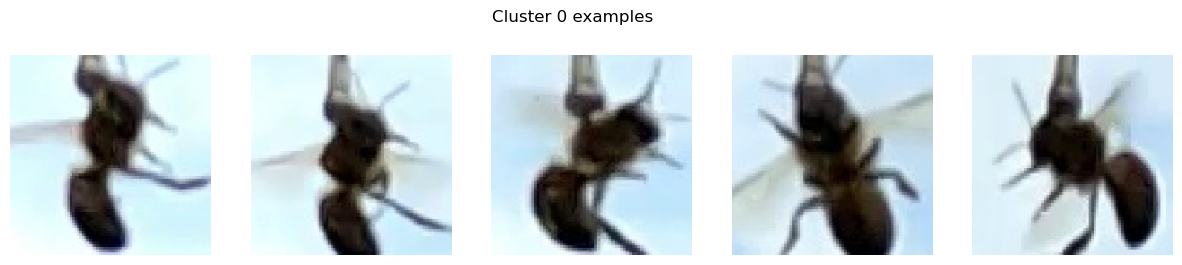

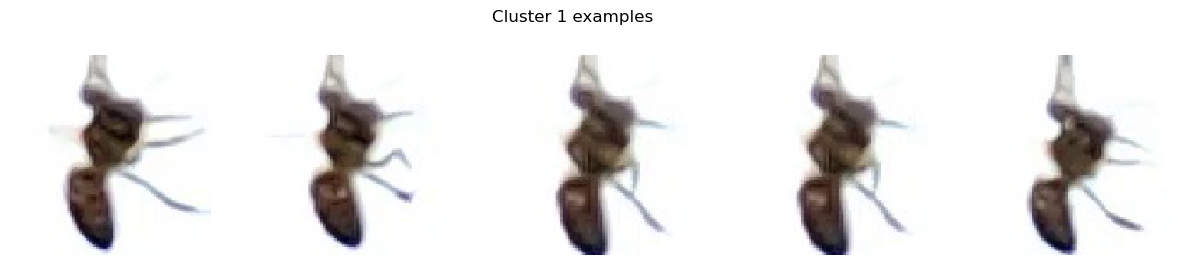

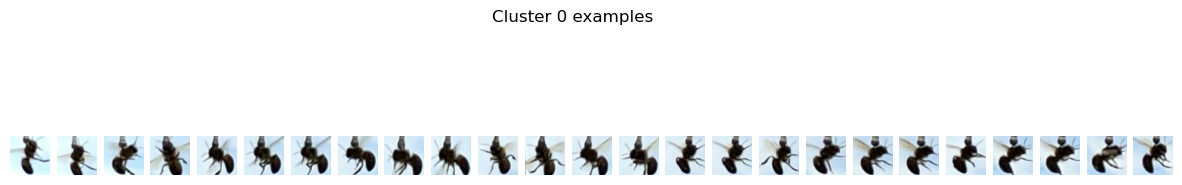

In [4]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# Import TensorFlow and the ResNet50 model along with its preprocessing function
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image

# Import k-means clustering from scikit-learn
from sklearn.cluster import KMeans

# -----------------------------------------------------------------------------
# Settings: adjust these as needed

# The directory where the images for clustering are located.
IMAGE_DIR = r"C:\Users\prol-\Documents\Masters\Thesis\dataset"  

# The size that ResNet50 expects (224 x 224 pixels). Images will be resized accordingly.
IMG_SIZE = (224, 224)

# The batch size used when extracting features from the images, for efficiency.
BATCH_SIZE = 32

# -----------------------------------------------------------------------------
def load_and_preprocess_image(img_path, target_size=IMG_SIZE):
    """
    Loads an image from disk, resizes it, and preprocesses it so that it can be 
    fed into the ResNet50 model. The preprocessing includes converting the image 
    into an array, expanding its dimensions to simulate a batch (required by the model), 
    and applying the appropriate scaling.
    
    Inputs:
      img_path (str): Path to the image file.
      target_size (tuple): Desired size of the image (width, height).

    Returns:
      x (numpy array): Preprocessed image ready for feature extraction.
    """
    # Load the image from disk and resize it
    img = image.load_img(img_path, target_size=target_size)
    # Convert the PIL image to a numpy array
    x = image.img_to_array(img)
    # Expand dimensions to simulate a batch size of one (shape: (1, height, width, channels))
    x = np.expand_dims(x, axis=0)
    # Preprocess the image compatible with ResNet50 (scaling, color normalization, etc.)
    x = preprocess_input(x)
    return x

# -----------------------------------------------------------------------------
def extract_features(model, image_paths):
    """
    Extracts features from a list of images using the provided CNN model (i.e., ResNet50).
    Features are extracted in batches for efficiency.
    
    Inputs:
      model: A pre-trained CNN model (ResNet50 without the classification head).
      image_paths (list): List of paths to image files.
    
    Returns:
      features (numpy array): Array containing the feature vectors for all images.
    """
    features = []             # List to store the feature vectors for each batch
    n_images = len(image_paths)  # Total number of images to process
    
    # Process images in batches
    for i in range(0, n_images, BATCH_SIZE):
        # Get a batch of image paths
        batch_paths = image_paths[i:i+BATCH_SIZE]
        batch_images = []   # List to store processed images in the current batch
        for path in batch_paths:
            # Load and preprocess each image
            img = load_and_preprocess_image(path)
            batch_images.append(img)
        # Stack the list into a single numpy array with shape (batch_size, IMG_SIZE[0], IMG_SIZE[1], 3)
        batch_images = np.vstack(batch_images)
        # Extract features by doing a forward pass through the model.
        # The output is the 2048-D vector per image when using global average pooling.
        batch_features = model.predict(batch_images)
        # Append the batch features to our list
        features.append(batch_features)
    # Concatenate all batches vertically into one array
    features = np.vstack(features)
    return features

# -----------------------------------------------------------------------------
def plot_cluster_examples(image_paths, labels, cluster, n_examples=5):
    """
    Plot some example images from a specific cluster. Useful for visual inspection.
    
    Inputs:
      image_paths (list): List of paths to image files.
      labels (numpy array): Array of cluster labels for each image.
      cluster (int): The specific cluster index to visualize.
      n_examples (int): Number of example images to display.
    """
    # Find indices of images that belong to the specified cluster
    indices = np.where(labels == cluster)[0]
    if len(indices) == 0:
        print("No images in cluster", cluster)
        return
    # Select the first n_examples images in that cluster (you could randomize this if desired)
    selected = indices[:n_examples]
    
    # Plot the selected images
    plt.figure(figsize=(15, 3))
    for j, idx in enumerate(selected):
        plt.subplot(1, n_examples, j+1)
        # Load each image for visualization (no preprocessing needed for plotting)
        img = image.load_img(image_paths[idx], target_size=IMG_SIZE)
        plt.imshow(img)
        plt.axis("off")
    # Add a title to the plot indicating which cluster is being visualized
    plt.suptitle(f"Cluster {cluster} examples")
    plt.show()

# -----------------------------------------------------------------------------
def main():
    """
    Main function to load all images, extract CNN features using a pre-trained ResNet50 model,
    perform k-means clustering on these features, and then display some example images from each
    cluster.
    """
    # Use glob to get a list of all image file paths in the specified directory.
    image_paths = glob.glob(os.path.join(IMAGE_DIR, "*"))
    if len(image_paths) == 0:
        print("No images found in", IMAGE_DIR)
        return
    print("Found", len(image_paths), "images")
    
    # Load a pre-trained ResNet50 model without the top (classification) layers. 
    # The global average pooling converts the convolutional feature maps to a single
    # 2048-D feature vector per image.
    base_model = ResNet50(weights="imagenet", include_top=False, pooling="avg", 
                          input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    
    # Extract features for all images using the model.
    print("Extracting features from images ...")
    features = extract_features(base_model, image_paths)
    print("Extracted features shape:", features.shape)
    
    # Use k-means clustering to cluster the feature vectors. Here we set k=2, 
    # meaning we attempt to group the images into 2 distinct clusters.
    print("Clustering features with k-means (k=2) ...")
    kmeans = KMeans(n_clusters=2, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    print("Cluster labels distribution:", np.bincount(cluster_labels))
    
    # Visualize some example images from each cluster to see what types of images have been grouped together.
    for cluster in range(2):
        plot_cluster_examples(image_paths, cluster_labels, cluster, n_examples=5)

    plot_cluster_examples(image_paths, cluster_labels, 0, n_examples=25)
# -----------------------------------------------------------------------------
# Standard Python convention to execute main only when this script is run directly
#if name == "__main__":
main()


In [3]:
plot_cluster_examples(image_paths, cluster_labels, 0, n_examples=25)

NameError: name 'image_paths' is not defined